## Enriched alleles for each population

In [13]:
# many functions have been defined but written down in different ipynb files, for clarity. Import those (%run)
%run Functions.ipynb
%run Functions_visualization.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# open netMHCpan output data for coevolution studies, and group accessory proteins like previously
# count no. of presented epitopes
proteins_grouped_coev2 = group_for_dict_abs_coev()
grouped_abs_coev2 = to_dict_abs_grouped(proteins_grouped_coev2, 2.0)

env gag pol tat rev nef vpr vpu vif gag acc pol env


In [21]:
# add additional hierarchy to dictionary, grouping reference strains into clades
df = pd.DataFrame(grouped_abs_coev2)
Clades = {}
Clades['HIV1-B'] = df.iloc[1:4].to_dict()
Clades['HIV1-C'] = df.iloc[5:8].to_dict()
grouped_Clade_BC_coev = dict_transpose_ABCD_DABC(Clades)

def sum_per_clade(inputdict): # sum of average no. of presented epitopes per protein
    output = sum([np.mean(inputdict[protein].values()) for protein in inputdict])
    return output

# per allele, per clade, calculate the total average no of presented epitopes in all reference strains and all proteins 
sum_clade_BC_coev = {allele : {clade : sum_per_clade(grouped_Clade_BC_coev[allele][clade]) for clade in grouped_Clade_BC_coev[allele]} for allele in grouped_Clade_BC_coev}
%store -r enriched_alleles_perpop
# above dictionary consists information for all alleles run in netMHCpan
# we now assign these alleles to the original population they were enriched in
# enriched_alleles_perpop contains list of enriched alleles per population, use this to obtain corresponding value in sum_clade_BC_coev dictionary
coev_per_poptemp = {pop: {allele : sum_clade_BC_coev[allele] for allele in enriched_alleles_perpop[pop]} for pop in enriched_alleles_perpop} 
coev_per_pop = {pop: dict_transpose_AB_BA(coev_per_poptemp[pop]) for pop in coev_per_poptemp}

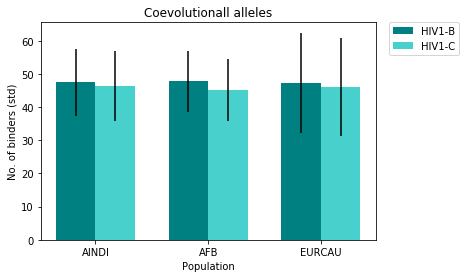

In [43]:
# plot bar chart with mean no. of presented peptides (binders) and std.dev of the enriched alleles of each population
bar_chart_coev(coev_per_pop, "all alleles")

## Split in HLA-A and HLA-B

In [44]:
enriched_A_perpop = {} # initiate
enriched_B_perpop = {} # initiate
for pop in enriched_alleles_perpop:
    As = [allele for allele in enriched_alleles_perpop[pop] if allele.startswith('HLA-A')] # select HLA-A alleles only
    enriched_A_perpop[pop] = As
    Bs = [allele for allele in enriched_alleles_perpop[pop] if allele.startswith('HLA-B')] # select HLA-B alleles only
    enriched_B_perpop[pop] = Bs

In [45]:
# similar as previously done for all alleles combined: assign alleles to original population they were enriched in
coev_per_poptempA = {pop: {allele : sum_clade_BC_coev[allele] for allele in enriched_A_perpop[pop]} for pop in enriched_A_perpop}
coev_per_popA = {pop: dict_transpose_AB_BA(coev_per_poptempA[pop]) for pop in coev_per_poptempA}

coev_per_poptempB = {pop: {allele : sum_clade_BC_coev[allele] for allele in enriched_B_perpop[pop]} for pop in enriched_B_perpop}
coev_per_popB = {pop: dict_transpose_AB_BA(coev_per_poptempB[pop]) for pop in coev_per_poptempB}

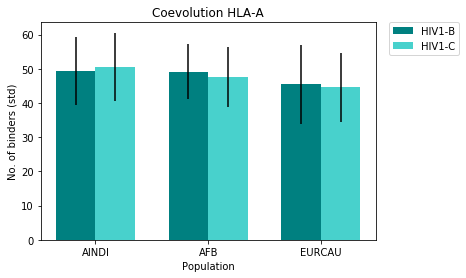

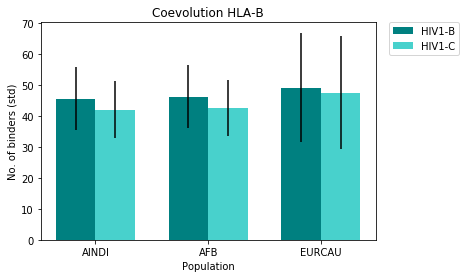

In [48]:
bar_chart_coev(coev_per_popA, "HLA-A")
bar_chart_coev(coev_per_popB, "HLA-B")